<a href="https://colab.research.google.com/github/nrjcs/iitpbse/blob/master/dl/day1/AND_gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementation of AND gate

In [ ]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
# Training set 1
# This will be used to train the network

# Input to the gate

x_train = np.array([[0,0],[0,1],[1,0],[1,1]], "uint8")

# Ouput of the gate, the truth value

y_train = np.array([[0],[0],[0],[1]], "uint8")

In [ ]:
# Training set 2 
# Let us use real nos. instead of binary int values

# Input to the gate
x_train = np.random.uniform(low = 0, high = 1,size=400)
x_train = np.reshape(x_train, [-1,2])
print(x_train.shape)

# Output or truth values for inputs
y_train = np.zeros([x_train.shape[0]])
print(len(y_train))
for i in range(x_train.shape[0]):
    if x_train[i,0]>=0.5 and x_train[i,1]>=0.5:
        y_train[i]=1
        
# let's check the values in training set
print(x_train[:10])
print(y_train[:10])


(200, 2)
200
[[0.70234706 0.2429267 ]
 [0.491847   0.13362382]
 [0.44729615 0.89101012]
 [0.14470914 0.39662006]
 [0.4018578  0.75365033]
 [0.41655352 0.85631026]
 [0.37848782 0.91637355]
 [0.21249205 0.52494931]
 [0.0332792  0.15786153]
 [0.98935356 0.34861014]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Create neural network model
# A sequential model is one where layers are stacked one
# after another and there is no skipping, feedback and
# distributed connection

model = Sequential()

# Add a single dense layer to the model
model.add(Dense(1, activation='sigmoid', input_dim=2))      # first hidden layer
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the neural networks model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("model compiled")

model compiled


In [ ]:
# Train the neural networks model
history = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
7/7 [==============================] - 1s 2ms/step - loss: 0.6755 - accuracy: 0.6000
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6050
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.6100
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6100
Epoch 5/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.6150
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.6250
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.6300
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6300
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6350
Epoch 10/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.6687 - accuracy: 0.6400
Epoch 11/1000
7/7 [

In [ ]:
# What actually varible 'history' is?
type(history)

keras.callbacks.History

In [ ]:
# Let's plot some graphs to see how training went by
history.history.keys()

dict_keys(['loss', 'accuracy'])

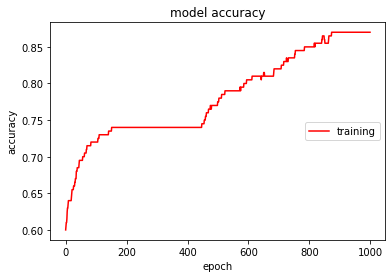

In [ ]:
# Behaviour of accuracy over the epochs

plt.plot(history.history['accuracy'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training'], loc='center right')
plt.show()

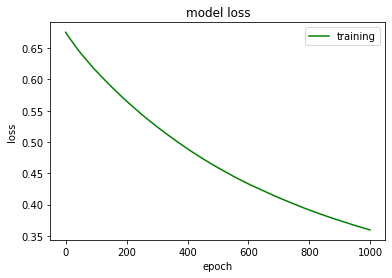

In [ ]:
# Behviour of loss over the epochs

plt.plot(history.history['loss'],'g')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'], loc='upper right')
plt.show()

In [ ]:
# Let's do some prediction

test = np.array([[.1,0.7]])
model.predict(test,batch_size=1)

array([[0.14456743]], dtype=float32)